# Exercise Sheet 4: Head Modeling

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import constants
import bci_minitoolbox as bci
import seaborn as sns

## Task 1: T1-MRI scan (1 point)
In Magnetic Resonance Imaging (MRI), a T1-scan is often used as a structural scan of the anatomy. This can be used to extract the individual geometry of the head of a subject. T1 is a certain longitudinal relaxation time of the nuclear spin of atoms and is dependent on the individual binding of the atoms and the aggregation state of the matter. Measuring the remaining resonance after a certain time can lead to insights on the composition of the matter under study.
The result is a spatially resololved intensity value that can be treated like any other 3-dimesnional gray-scale image.

The file T1.npy contains the T1-scan of a human subject's head. In this image, the first dimension represents the direction from left to right pre-auricular point (a certain point above the ear channel on the ear conch). This direction is also called lateral. The second dimension is defined by the direction from the center between the two pre-auricular points (called the intra-auricular point) to the nasal point (on the nose between the eyes). This dimension is also called frontal. The third and last dimension is perpendicular to the other two dimensions oriented towards the top of the head. It's called the superior direction.

**Tasks:**

a) Use the command *imshow* from the Matplotlib to plot 3 images in each mid-plane slice of the MRI.

b) Plot a histogram over the intensity values (function *hist*) in a linear and a logarithmic scale for the frequency.

What can you say about the intensity values of different tissue types? Are they well separated?

In [2]:
mri=np.load('T1.npy')
print(mri.shape)

(192, 256, 256)


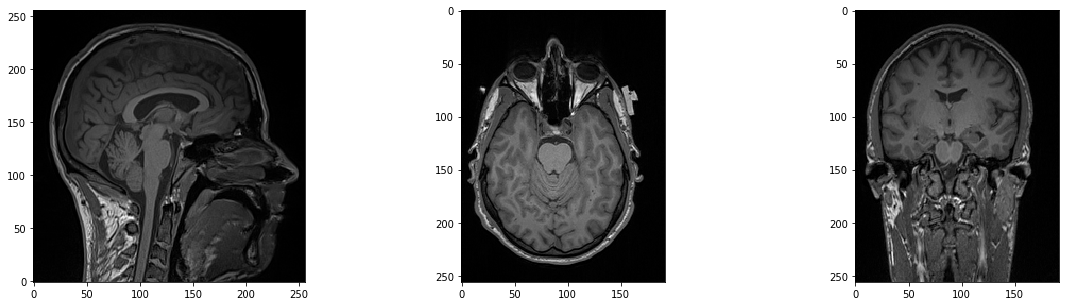

In [3]:
mri_swapped = np.swapaxes(mri,1,2)
fig_1 = plt.figure(1, figsize= (20,5) )
plt.subplot(1,3,1 )
plot_1 = plt.imshow(mri_swapped[90,:,:], cmap = "gray", origin = "Lower" )
plt.subplot(1,3,2)
plot_2 = plt.imshow(np.rot90(mri[:,:,128],1), cmap = "gray")
plt.subplot(1,3,3)
plot_3 = plt.imshow(np.rot90(mri_swapped[:,:,128],1), cmap = "gray")



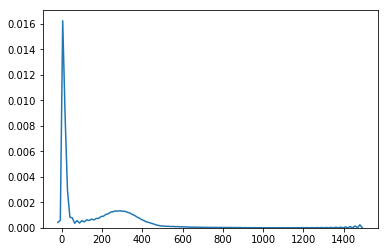

In [8]:
flattened_mri = mri.reshape(192*256*256)
#plt.hist(flattened_mri )
sns.distplot(flattened_mri, hist= False)

## Task 2: Tissue masks  (1 point)
Correct segmentation is a non-trivial task, which a lot of scientific literature can be found on. There are automatic and semi-automatic routines, but many times  aditional manual error-correction is done if precise segmentations are needed. Here we want to look at the results of on an automatic routine developed in [Huang, Y., Dmochowski, J.P., Su, Y. and Datta, A. (2013), 'Automated mri segmentation for individualized modeling of current flow in the human head', Journal of Neural Engineering, 10(6):066004].

The tissue masks extracted by this algorithm have been based upon the SPM-toolbox (http://www.fil.ion.ucl.ac.uk/spm/) and the new_segement algorithm therein. The algorithm uses a tissue probability map (TPM) extended to the neck, where local probabilities of tissue occurrence are additionally used as priors for the extraction. The MRI is first matched to the TPM by a non-linear deformation (=warp) and then the local intensities are evaluated based on their intensity value and the additional information of local tissue probability.

**Tasks:**

Load the files for the 6 different tissue types (air,CSF,gray matter,white matter, scalp, skull) and display them all in a medial sagittal cut (the medium vertical plane from the side of the head) with *imshow*.

Text(0.5, 1.0, 'white')

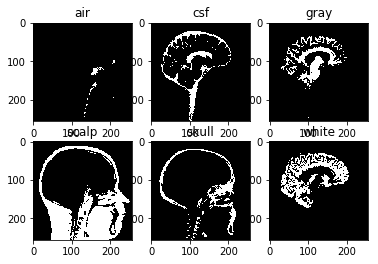

In [10]:
air=np.load('air.npy')
csf=np.load('csf.npy')
gray=np.load('gray.npy')
scalp=np.load('scalp.npy')
skull=np.load('skull.npy')
white=np.load('white.npy')

plt.subplot(2,3,1)
plt.imshow(np.rot90(air[96,:,:],1), cmap = "gray")
plt.title("air")

plt.subplot(2,3,2)
plt.imshow(np.rot90(csf[96,:,:],1), cmap = "gray")
plt.title("csf")

plt.subplot(2,3,3)
plt.imshow(np.rot90(gray[96,:,:],1), cmap = "gray")
plt.title("gray")

plt.subplot(2,3,4)
plt.imshow(np.rot90(scalp[96,:,:],1), cmap = "gray")
plt.title("scalp")

plt.subplot(2,3,5)
plt.imshow(np.rot90(skull[96,:,:],1), cmap = "gray")
plt.title("skull")

plt.subplot(2,3,6)
plt.imshow(np.rot90(white[96,:,:],1), cmap = "gray")
plt.title("white")



## Task 4: T1 intensities by tissue class  (2 points)
As we now have the spatial distribution of differen tissue types, we can check how the different T1-intensity values are distributed within each type. 

**Tasks:**

Therefor, plot histograms (*np.histogram*) that only consist of those parts of the MRI that belong to a certain tissue type by using the masks from exercise 2. Also, plot a histogram of all 6 tissue types at once (this is different than the histograms from task 1, because the air outside the head has been removed from the segmentations). Plot all histograms into one plot.

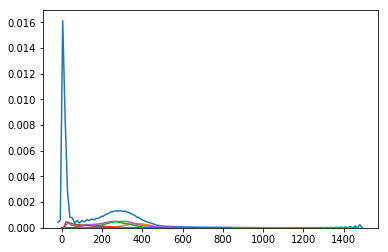

In [26]:
sns.distplot((mri*(~air) ).reshape(192*256*256), hist = False)
sns.distplot((mri*gray).reshape(192*256*256), hist = False)
sns.distplot((mri*white).reshape(192*256*256), hist = False)
sns.distplot((mri*csf).reshape(192*256*256), hist = False)
sns.distplot((mri*scalp).reshape(192*256*256), hist = False)
sns.distplot((mri*skull).reshape(192*256*256), hist = False)

## Task 4: Equivalent current dipole close to a conductivity change (4 points)
A simple way of solving a change in conductivity between two homegeneous subspaces is the so-called "mirror method": the electrical field/potential of a source distribution is mirrored at the surface and the dipole moment $p$ and the distance $r$ are set so the boundary conditions are fulfilled.

We will only look at a very simple and abstract case, the jump from a compartment containing the source with higher to much lower conductivity. This is similar as in the lecture.

In this case, the potential on the boundary can be set to $\phi (x=0) =0$. 

**Task:**

Use the functions phi_dip and E_dip from the first exercise sheet (copied below) to model the field of a dipole sitting at $r=[-2,0]$ in a subspace with low conductivity while there is a sudden change to high conductivity at a plane of $x=0$.

Make a plot of the two variables in two dimensions similar to the one from sheet 1 task 5 from -10 to 10 for both axes in the x/y-plane for a dipole at origin with dipole moment $\vec{p}=[1,0]$ with a resolution of 10 samples/unit. Repeat the same with $\vec{p}=[0,1]$.

Plot the potential similar as in shhet 1 as decibel (dB) values using the matlpotlib function plt.contour/contourf for plotting and the field strength in it's original scale using the function plt.streamplot. Draw both plots into the same figure. The arguments to the plot function call for $\vec{E}$- and $\phi$- values again need to have the shape corresponding to the XX and YY variables from np.meshgrid (see below).

*Hint: You must simply add the field of a dipole sitting at $-r$ with the corresponding dipole moment to elicit a cancelation of the voltage at x=0.*

In [45]:
XX

array([[-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       ...,
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ]])

C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in sign
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sign
C:\Users\Mousa\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid

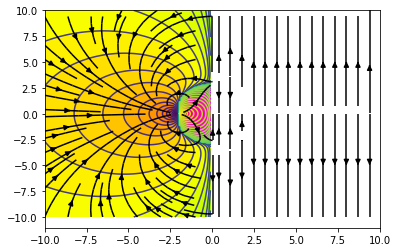

In [83]:
def phi_dip(r, p, r_0=None):
    r=np.array(r)
    p=np.array(p)    
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T
    return 1/(4*np.pi*constants.epsilon_0)*(np.tensordot(p,r,axes= 1))/np.power(np.linalg.norm(r,axis=0),3)

def E_dip(r, p, r_0=None):
    r=np.array(r)
    p=np.array(p)
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T   
    nom=((3*np.tensordot(p,r,1)*r/np.power(np.linalg.norm(r,axis=0),2)).T-p).T
    return (1/(4*np.pi*constants.epsilon_0)*nom/np.power(np.linalg.norm(r,axis=0),3))

xyresolution=0.1;
x=np.linspace(-10,10,round(20/xyresolution)+1)
y=np.linspace(-10,10,round(20/xyresolution)+1)

x2=np.linspace(0,10,round(20/xyresolution)+1)
y2=np.linspace(0,10,round(20/xyresolution)+1)

X2,Y2 = np.meshgrid(x2,y2)

XX,YY=np.meshgrid(x,y)
p=np.array([1,0])

r_0 = [-2,0]
r_0_2 = [2,0]

phi_2 = phi_dip([XX,YY], p, r_0_2)
E_2 = E_dip([XX,YY],p , r_0_2)

r=np.array([XX,YY])

phi_1=phi_dip([XX,YY],p,r_0)

E_1=E_dip([XX,YY],p,r_0)
E_2=E_dip([XX,YY],p,r_0_2)

E = E_1 + E_2

phi = phi_1 + phi_2


E[0:1,:,100:201] = 0
phi[:,100:201] = 0

#Plot the results: the sign in the potential is not neccessary
#(actually numerically wrong if you take it serously), but helps for seeing the difference
potplot=plt.contour(x,y,20*np.log10(np.abs(phi))*np.sign(phi),100)
potplot=plt.contourf(x,y,20*np.log10(np.abs(phi))*np.sign(phi),100,cmap=plt.cm.hsv)
fieldplot=plt.streamplot(x,y,E[0,:,:],E[1,:,:],color='k')
plt.show()

## Task 5: 4-shell 3D-mesh of a human head  (1 point)
From these segmented MRIs, different geometrical representations can be extracted for further numerical head modeling. For Finite Element Method (FEM) head modeling, using the voxels of the MRI as the single discrete finite elements would be the next step. We will in contrast focus on the Boundary Element Method (BEM) for head modeling. For BEM head models a representation of the boundaries between different subdomains is needed. This is mostly done in a triangular fashion, where every surface is represented by a set of vertexes (points) and the triangles connecting them.

The extraction of the meshes was in our case done by the *project_mesh* algorithm of the fieldtrip tolbox (http://fieldtriptoolbox.org/), which starts with a uniform polygon for each tissue type and projects every vertex of it to the outermost position still within the specific tissue type. The results for 4-shells with tissue types brain, CSF, skull and scalp are saved in positions of vertices in 3 dimensions (pos1-pos4) and the indices of the individual vertices connected by triangles (tri1-tri4). The variable names are sorted from inside of the brain (pos1/tri1) to the scalp (pos4/tri4) and the origin is located at the intra-auricular point within the brain (center between both ears).

**Tasks:**

Use the *ax.plot_trisurf* function to plot the 4 shells into one 3-dimensional figure (*ax = fig.add_subplot(111, projection='3d'*) in different colors. Set the alpha level (the transparency) of each shell accordingly to be able to see the inner shells from outside.

In [116]:
pos1=np.load('bnd4_pos1.npy')
tri1=np.load('bnd4_tri1.npy')
pos2=np.load('bnd4_pos2.npy')
tri2=np.load('bnd4_tri2.npy')
pos3=np.load('bnd4_pos3.npy')
tri3=np.load('bnd4_tri3.npy')
pos4=np.load('bnd4_pos4.npy')
tri4=np.load('bnd4_tri4.npy')

%matplotlib notebook

In [117]:
pos1[:,0]

array([ 0.05887885,  0.05583386,  0.05738569, ..., -0.06697272,
       -0.06975673, -0.06905386])

<IPython.core.display.Javascript object>


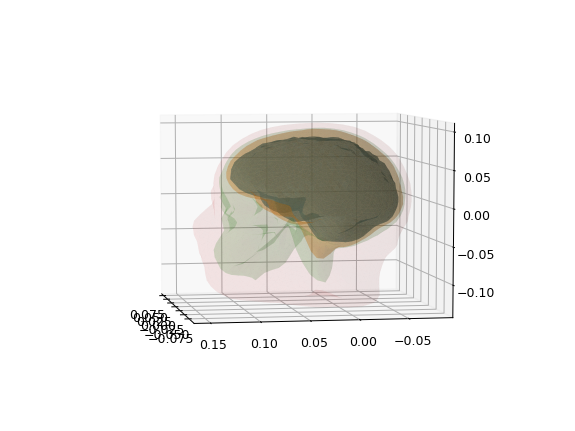

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_trisurf(pos1[:,0],pos1[:,1], pos1[:,2], alpha = 0.5, triangles = tri1)
ax.plot_trisurf(pos2[:,0],pos2[:,1], pos2[:,2], alpha = 0.2, triangles = tri2)
ax.plot_trisurf(pos3[:,0],pos3[:,1], pos3[:,2], alpha = 0.1, triangles = tri3)
ax.plot_trisurf(pos4[:,0],pos4[:,1], pos4[:,2], alpha = 0.05, triangles = tri4)

## Task 6: Head models and the equivalent current dipole  (4 points)
From the boundaries of task 5, a head model can be created using a BEM solver like openMEEG ( http://openmeeg.github.io ). This solver assumes linearity, homogenity and anisotropy in conductivity within each of the compartements.

Neuronal source positions are mostly defined based on theoretical assumptions. These are, that the main signals originate in the gray matter close to the cerebral cortex (see lecture 1) of the brain. In this simulation, gridpositions are assumed to be on the interface between gray and white matter which introduces a small error but simplifies source location extraction. The positions of the 3990 single sources are saved in the variable *gridpos*.

In general this leadfield is based on a representation incorporating a head matrix *A* connecting the boundary conditions for all the surfaces with the source terms $b$ coming from neuronal activity or current injections. This so-called forward problem is defined by:

$A\mathbf{x}=\mathbf{b}$

To calculate the voltages and currents on the surface, the inverse $A^{-1}$ is needed.. $b_i=\left[B\right]_{(i)}\cdot \left[P\right]_(i)$ for the neuronal sources of EEG is given by the inner product of *dsm* (dipole source model) $B$ with the individual dipole moment $\left[P\right]_{(i)}$. $B$ is 3-dimensional in the second dimension to account for the spatial orientation of the dipole.  By the inner product with the dipole moment $\left[P\right]_{(i)}$ in 3 dimensions for each source location it is reduced to one value per source which is thus reduced to the vector $\mathbf{b}$. Usually this is assumed normal to the cortex but here we simply define it independent of that for simplicity. If we take unity dipole moments ($\left|\left[P\right]_{(i)}\right|^2=1$), the source amplitude $\mathbf{s}$ can be noted as a single vector with one value per source. 

$\mathbf{x}=A^{-1}\mathbf{b}$

To get from single source activity (amplitude) $\mathbf{s}$ to the state variables (jumps of potentials and curents on the sufaces) $\mathbf{x}$. The potentials on the scalp or brain can then be interpolated from the variable $\mathbf{x}$ by a certain interpolation matrix. For the scalp surface this interpolation matrix $W$ is here called *h2em* (head to electrode model) and the one corresponding to the brain surface potenial is *h2cortex* (head to cortex surface). By the marix product of $\mathbf{x}$ with *h2em* and *h2cortex* we get the resulting potentials on the scalp and on the cortex respectively. To put it into one equation, the leadfield $L$ for head or brain surface voltage v is:

$v=Ls= W A^{-1}\mathbf{b}$

The file 'cortex2dsm.npy' already is the product of *h2cortex*($W$), *hminv*($A^{-1}$) and *dsm*($B$) to reduce memory needed. You only have to select the right dipole.

**Tasks:**

a) Plot the distribution of the potential on the brain surface using the *plot_trisurf* function from task 5 in combination with indiviudally colored triangles. The key function to this is the method *.set_facecolors(colors)* of the object returned by plot_trisurf, where colors is of shape (NoTri,3) or (NoTri,4) depending on the colormap and the RGB definition the colormap uses. See here how to translate scalar values to RGB colormaps: https://matplotlib.org/api/cm_api.html. Do this for the analytic solution from exercise sheet #1 (given below as *phi_dip*) as well as for the potential values delivered by the openMEEG toolbox. As the potential is defined point-wise, for plotting the color of each triangle you can use the average of the 3 surrounding points for each triangle.

*Hint: The potential in OpenMEEG is defined differently with respect to constants: It does not have $\frac{1}{\epsilon_0}$ in the prefactor but the source conductivity $\frac{1}{\sigma_1}$: $\phi(\vec{r})_{OM}=\frac{1}{4\pi\sigma_1}\frac{\vec{p}\cdot\left(\vec{r}-\vec{r}_0\right)}{\left|\vec{r}-\vec{r}_0\right|^3}$. To get both onto one scale, you have to multiply one of the two accordingly. $\sigma_1=0.201$ *

*Hint: You can use the np.tensordot function as a generalization of matrix products. You have to indicate which dimensions are multiplied accordingly.*

b) Also, use the simple *plot* function to plot the voltage for both the analytic solution in infiinite space and the BEM soution on the cortex surface over the triangle number/the vertexes to get a closer look at individual values.

Are the solutions equal? Try to explain your results.

In [133]:
def phi_dip(r, p, r_0=None):
    r=np.array(r)
    p=np.array(p)    
    if r_0 is not None:
        r_0=np.array(r_0)
        r=(r.T-r_0).T
    return 1/(4*np.pi*constants.epsilon_0)*(np.tensordot(p,r,1))/np.power(np.linalg.norm(r,axis=0),3)


pos1=np.load('bnd4_pos1.npy')
tri1=np.load('bnd4_tri1.npy')
pos2=np.load('bnd4_pos2.npy')
tri2=np.load('bnd4_tri2.npy')
pos3=np.load('bnd4_pos3.npy')
tri3=np.load('bnd4_tri3.npy')
pos4=np.load('bnd4_pos4.npy')
tri4=np.load('bnd4_tri4.npy')

cortex2dsm=np.load('cortex2dsm.npy')
gridpos=np.load('gridpos.npy')
pos1=np.load('bnd4_pos1.npy')
tri1=np.load('bnd4_tri1.npy')
NoTri=tri1.shape[0]
NoPnt=pos1.shape[0]

<IPython.core.display.Javascript object>


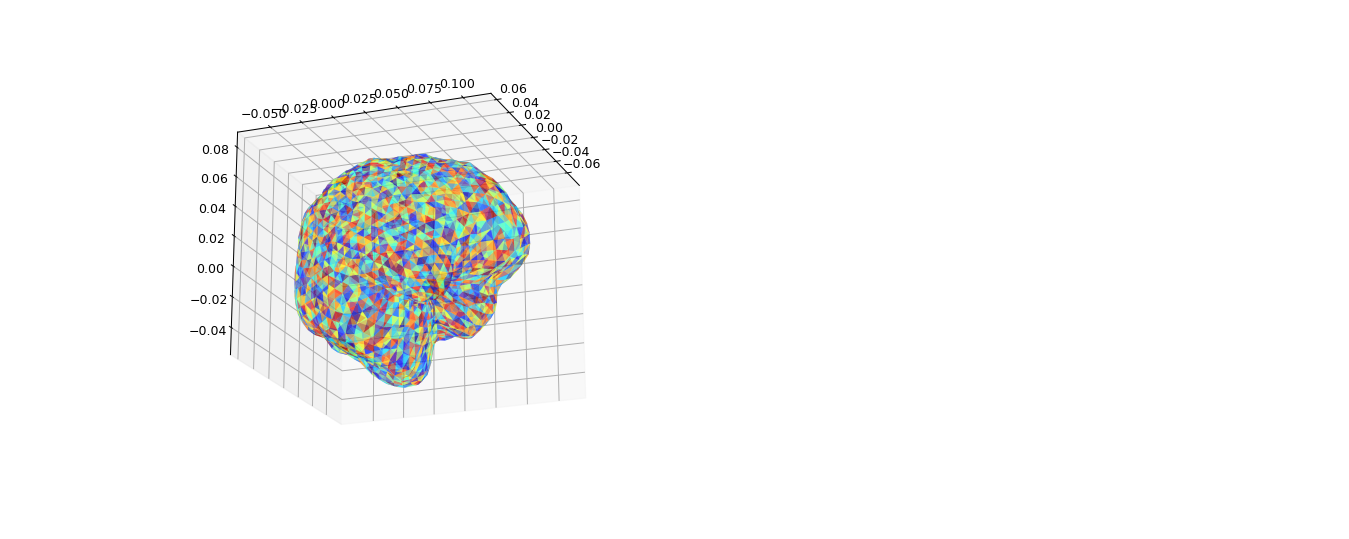

In [135]:
#this is an example, how to plot colored triangles (there is also other ways):
phis=np.random.rand(tri1.shape[0])
mappy=plt.cm.ScalarMappable(cmap=plt.cm.jet)
mappy.set_clim([0,1])
mappy.set_array([])

fig = plt.figure(figsize=[15,6])
ax = fig.add_subplot(121, projection='3d')
trisufplt=ax.plot_trisurf(pos1[:,0],pos1[:,1], pos1[:,2], alpha = 0.5, triangles = tri1)#this line needs to be completed
trisufplt.set_facecolors(mappy.to_rgba(phis))
ax.view_init(elev=0, azim=15)

## Task 5: EEG: scalp and electrode potential  (2 points)

Those of you who attended the BCI-IL course in the winter term might remember the bci_minitoolbox with it's function *scalpmap*. We used this function to plot event-related potentials (ERPs) measured by EEG on a 2-dimensional scalp, which is a standard procedure in EEG analysis. Also, we plotted spatial patterns and filters with it.

Now, we can use the same function to plot a simulated scalp potential from a neuronal source of our head modeling approach. Therefor we will need to use the head to electrode model *h2em* to interpolate the voltages at the electrodes from those at the vertex. For the scalp surface the interpolation matrix $W$ is here called *h2em* (head to electrode model). By the marix product of $x$ with *h2m* and *h2cortex* we get the resulting potentials on the scalp and on the cortex respectively. To put it into one equation, the leadfield $L$ for head or brain surface is:

$L= W A^{-1}b$

The file 'em2dsm.npy' already is the product of *h2em*($W$), *hminv*($A^{-1}$) and *dsm*($B$) to reduce memory needed. You only have to select the right dipole.

Also, we will need the montage *mnt*, which sets the position for each channel. Additionally you can find the channel labels *clab* to look at the corresponding channel names (not needed to solve the task).

**Tasks:**

Plot the scalp potential for a dipole of your choice from the leadfield using bci.scalpmap(mnt, V, clim=(-*maxamp*,*maxamp*), cb_label=*labelstring*) from the bci_minitoolbox library that was used in the BCI-IL in winter term.

In [ ]:
em2dsm=np.load('em2dsm.npy')
mnt=np.load('mnt.npy')
clab=np.load('clab.npy')
